<a href="https://colab.research.google.com/github/ullola17/datos_masivos_02/blob/main/PokemonDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1pRgaq5w_rmKP8k-tQqN7dLa-2IyoPonU')

In [ ]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


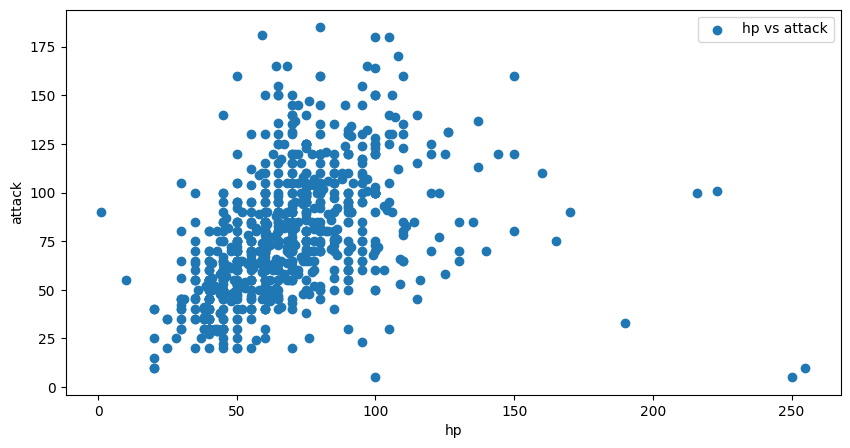

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Visualizar los datos
plt.figure(figsize=(10, 5))
plt.scatter(df["hp"], df["attack"], label="hp vs attack")
plt.xlabel("hp")
plt.ylabel("attack")
plt.legend()
plt.show()

# Codificar las variables categóricas
df["type1"] = df["type1"].astype("category")
df["type2"] = df["type2"].astype("category")
df["is_legendary"] = df["is_legendary"].astype("category")

# Modelo
plt.figure(figsize=(10, 5))

In [ ]:
# Se eliminan columnas que no se necesitan
df = df.drop(["type1", "type2", "name"], axis=1)

In [ ]:
# Eliminar columna "capture_rate"
df = df[df['capture_rate'] != '30 (Meteorite)255 (Core)']

# Valores nulos -> 0
df = df.fillna(0)

In [ ]:
# Codificar la columna "abilities" usando Label Encoding
encoder = LabelEncoder()
df["abilities"] = encoder.fit_transform(df["abilities"])

In [ ]:
# Clasificar los Pokémon en categorías correspondientes en la columna "classfication"
df["classfication"] = df["classfication"].astype("category").cat.codes


In [ ]:
# Eliminar"japanese_name"
df = df.drop("japanese_name", axis=1)

<ipython-input-114-5e13333aa581>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


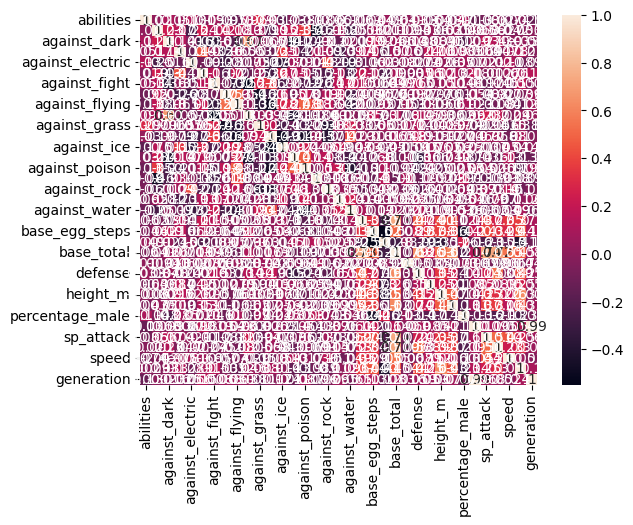

In [ ]:
# Matriz de correlación
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Separar los datos en características (X) y etiquetas (y)
X = df.drop("generation", axis=1)
y = df["generation"]

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Realizar selección de características basada en importancia
selector = SelectFromModel(LogisticRegression(max_iter=1000))
selector.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Características
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Cuadrícula de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Instanciar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

In [ ]:
# Realizar búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Modelo mejores hiperparámetros
best_model = grid_search.best_estimator_

# Evaluar el modelo
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.97


In [ ]:
# Reporte
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        31\n           2       1.00      0.94      0.97        17\n           3       0.93      1.00      0.97        28\n           4       1.00      0.94      0.97        17\n           5       0.94      1.00      0.97        33\n           6       1.00      0.87      0.93        15\n           7       1.00      1.00      1.00        19\n\n    accuracy                           0.97       160\n   macro avg       0.98      0.96      0.97       160\nweighted avg       0.98      0.97      0.97       160\n'

In [ ]:
# Clasificaciones únicas
num_unique_classifications = df['classfication'].nunique()
print(f"Número de clasificaciones únicas: {num_unique_classifications}")

Número de clasificaciones únicas: 587


In [ ]:
# Agrupar filas por nombre de clasificación
df_clasificacion = df_nuevo.groupby('classfication').size().reset_index(name='cantidad')

# Ordenar
df_clasificacion = df_clasificacion.sort_values(by='cantidad', ascending=False)

# Imprimir el conteo por clasificación
df_clasificacion


,classfication,cantidad
8,339,6
5,186,5
4,103,4
10,381,4
11,447,4
12,455,3
17,583,2
2,75,2
14,523,2
1,44,2


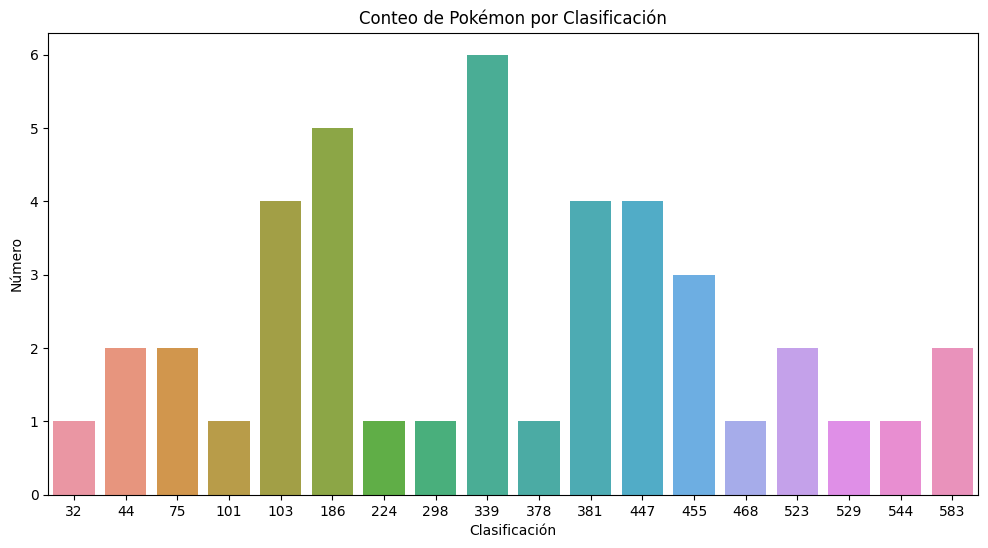

In [ ]:
plt.figure(figsize=(12, 6))

# Graficar el conteo por clasificación como un gráfico de barras
sns.barplot(x='classfication', y='cantidad', data=df_clasificacion)

# Configurar etiquetas y título
plt.xlabel('Clasificación')
plt.ylabel('Número')
plt.title('Conteo de Pokémon por Clasificación')

# Mostrar la gráfica
plt.show()